In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [49]:
text_df = pd.read_csv("Datasets/twcs.csv", encoding = "utf-8", low_memory=False)
text_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [50]:
text_df[text_df["text"].isna()]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id


In [51]:
def remove_tags(text):
    return ' '.join(word for word in str(text).split() if not word.startswith("@") and not word.startswith(".@"))

In [52]:
#remove @ tags
text_df["text"] = text_df["text"].apply(lambda text: remove_tags(text))
text_df.head(20)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,I understand. I would like to assist you. We w...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,I have sent several private messages and no on...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,Please send us a Private Message so that we ca...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,"Can you please send us a private message, so t...","5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,This is saddening to hear. Please shoot us a D...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,You gonna magically change your connectivity f...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,We understand your concerns and we'd like for ...,12,16.0


In [53]:
import re

def remove_emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [54]:
#remove emojis from text
text_df["text"] = text_df["text"].apply(lambda text: remove_emoji(text))
text_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,I understand. I would like to assist you. We w...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,I have sent several private messages and no on...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,Please send us a Private Message so that we ca...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,I did.,4,6.0


In [55]:
def remove_name(text):
    return re.sub("[/\-^*]\s*\w+\s*\Z", "", text)

In [56]:
#remove names from text
text_df["text"] = text_df["text"].apply(lambda text: remove_name(text))
text_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,I understand. I would like to assist you. We w...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,I have sent several private messages and no on...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,Please send us a Private Message so that we ca...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,I did.,4,6.0


In [57]:
#remove responses where customer support asks customer to DM them for help
text_df = text_df[~text_df["text"].str.contains(r"\b(dm|direct message|pm|private message)\b", case = False, regex = True)]

C:\Users\wwaihoe\AppData\Local\Temp\ipykernel_14768\2074145510.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  text_df = text_df[~text_df["text"].str.contains(r"\b(dm|direct message|pm|private message)\b", case = False, regex = True)]


In [58]:
#remove rows with empty text
text_df = text_df[text_df["text"] != ""]
text_df = text_df[text_df["text"].str.isspace() == False]

In [59]:
print(text_df.shape)

(2437293, 7)


In [60]:
#merge query tweets and response tweets
initial_inbound = text_df[pd.isnull(text_df["in_response_to_tweet_id"]) & text_df["inbound"]]
query_response_xy = pd.merge(initial_inbound, text_df, left_on="tweet_id", right_on="in_response_to_tweet_id", suffixes=("_x", "_y"))
query_response = pd.merge(initial_inbound, text_df, left_on="tweet_id", right_on="in_response_to_tweet_id", suffixes=("_a", "_b"))
print(query_response.shape)
query_response.head()

(628778, 14)


,tweet_id_a,author_id_a,inbound_a,created_at_a,text_a,response_tweet_id_a,in_response_to_tweet_id_a,tweet_id_b,author_id_b,inbound_b,created_at_b,text_b,response_tweet_id_b,in_response_to_tweet_id_b
0,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,"9,6,10",NaN,9,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,I would love the chance to review the account ...,NaN,8.0
1,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,"9,6,10",NaN,10,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,Hello! We never like our customers to feel lik...,NaN,8.0
2,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,y’all lie about your “great” connection. 5 bar...,17,NaN,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,H there! We'd definitely like to work with you...,16,18.0
3,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,28,Ask_Spectrum,False,Tue Oct 31 22:05:37 +0000 2017,The information pertaining to the account assu...,24,29.0
4,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,Yo your customer service reps are super nice— ...,30,NaN,30,Ask_Spectrum,False,Tue Oct 31 22:12:09 +0000 2017,"Hello, My apologies for any frustrations or in...",NaN,31.0


In [61]:
query_response_xy.to_csv("Datasets/query_response.csv", index = False, encoding='utf-8')

In [62]:
count = query_response.groupby("author_id_b")["text_b"].count()
count

author_id_b
10026                 1
10304                 1
10766                 1
10821                 1
11113                 1
                   ... 
mediatemplehelp     177
nationalrailenq    1924
sainsburys         8358
sizehelpteam        342
sprintcare         5973
Name: text_b, Length: 69483, dtype: int64

<Axes: ylabel='author_id_b'>

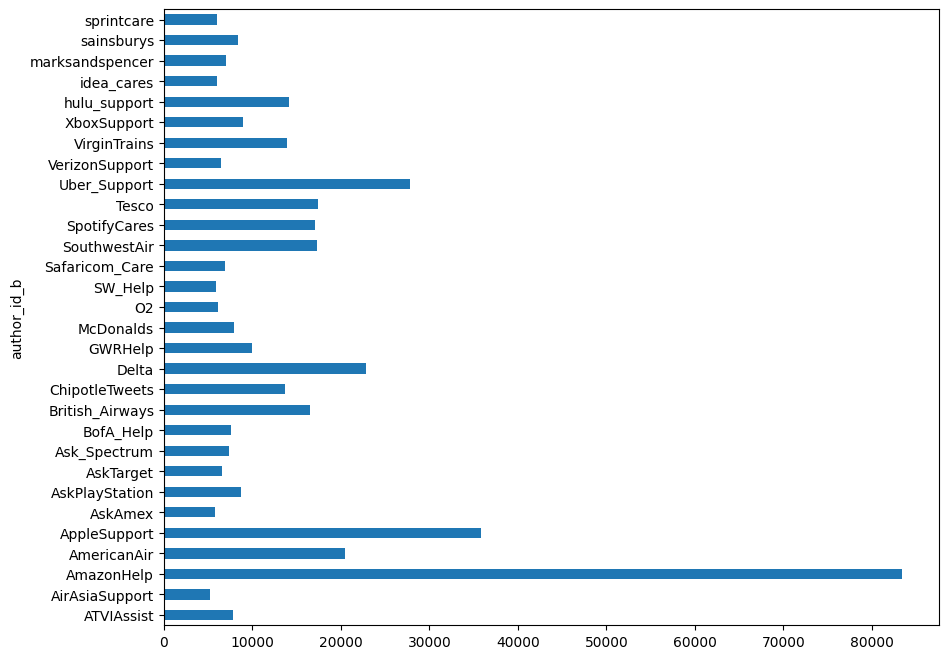

In [63]:
plt.figure(figsize=(30,30))
count[count>5000].plot(kind = "barh", figsize=(10, 8))

In [64]:
#retain only queries to tech related companies
query_response = query_response.loc[query_response["author_id_b"].isin(["hulu_support", "sprintcare", "comcastcares", "XboxSupport", "VerizonSupport", "TMobileHelp", "SpotifyCares", "MicrosoftHelps", "HPSupport", "DellCares", "Ask_Spectrum", "AskPlayStation", "AppleSupport", "AdobeCare"])]
query_response_xy = query_response_xy.loc[query_response_xy["author_id_y"].isin(["hulu_support", "sprintcare", "comcastcares", "XboxSupport", "VerizonSupport", "TMobileHelp", "SpotifyCares", "MicrosoftHelps", "HPSupport", "DellCares", "Ask_Spectrum", "AskPlayStation", "AppleSupport", "AdobeCare"])]
print(query_response.shape)

(126309, 14)


In [71]:
query_response_xy.to_csv("Datasets/query_response_tech.csv", index = False, encoding='utf-8')

In [65]:
sf = string.ascii_lowercase[1:] + string.ascii_uppercase

i = 0
query_response_merge = query_response.copy(deep=True)
query_response_list = []
query_response_list.append(query_response_xy)


#dialog of up to 10 lines
while i<=6:
    query_response_out = pd.DataFrame()
    query_response_merge = pd.merge(query_response_merge, text_df.add_suffix(f"_{sf[i+1]}"), left_on=f"tweet_id_{sf[i]}", right_on=f"in_response_to_tweet_id_{sf[i+1]}", suffixes=(None, None))
    i+=1
    query_response_merge = pd.merge(query_response_merge, text_df.add_suffix(f"_{sf[i+1]}"), left_on=f"tweet_id_{sf[i]}", right_on=f"in_response_to_tweet_id_{sf[i+1]}", suffixes=(None, None))
    i+=1

    query_response_out["text_x"] = query_response_merge["text_a"]
    for n in range(i):
        query_response_out["text_x"] += ' EOS ' + query_response_merge[f"text_{sf[n]}"]

    query_response_out["author_id_x"] = query_response_merge["author_id_a"]
    query_response_out["author_id_y"] = query_response_merge["author_id_b"]
    query_response_out["created_at_x"] = query_response_merge["created_at_a"]
    query_response_out["created_at_y"] = query_response_merge[f"created_at_{sf[i]}"]
    query_response_out["text_y"] = query_response_merge[f"text_{sf[i]}"]

    query_response_list.append(query_response_out)
    #query_response_out.to_csv(f"Datasets/query_response_tech_{i+2}.csv", index = False, encoding='utf-8')

    if (~pd.isnull(query_response_merge[f"response_tweet_id_{sf[i]}"])).any():
        query_response_merge = query_response_merge[~pd.isnull(query_response_merge[f"response_tweet_id_{sf[i]}"])]
        continue
    else:
        break

In [66]:
print(len(query_response_list))

5


In [67]:
query_response_df = query_response_list[0]

for df in query_response_list[1:]:
    query_response_df = pd.concat([query_response_df,df])

query_response_df.to_csv("Datasets/query_response_tech_multi(10).csv", index = False, encoding='utf-8')

In [68]:
print(len(query_response_df))

177712


In [69]:
query_response_df[query_response_df["text_y"].isna()]

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y


In [70]:
query_response_df.head()

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8.0,115712,True,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,"9,6,10",NaN,9.0,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,I would love the chance to review the account ...,NaN,8.0
1,8.0,115712,True,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,"9,6,10",NaN,10.0,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,Hello! We never like our customers to feel lik...,NaN,8.0
2,18.0,115713,True,Tue Oct 31 19:56:01 +0000 2017,y’all lie about your “great” connection. 5 bar...,17,NaN,17.0,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,H there! We'd definitely like to work with you...,16,18.0
3,29.0,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,28.0,Ask_Spectrum,False,Tue Oct 31 22:05:37 +0000 2017,The information pertaining to the account assu...,24,29.0
4,31.0,115717,True,Tue Oct 31 22:06:54 +0000 2017,Yo your customer service reps are super nice— ...,30,NaN,30.0,Ask_Spectrum,False,Tue Oct 31 22:12:09 +0000 2017,"Hello, My apologies for any frustrations or in...",NaN,31.0


In [72]:
sf = string.ascii_lowercase[1:] + string.ascii_uppercase

i = 0
query_response_merge = query_response.copy(deep=True)
query_response_list = []
query_response_list.append(query_response_xy)


#dialog of up to 20 lines
while i<=16:
    query_response_out = pd.DataFrame()
    query_response_merge = pd.merge(query_response_merge, text_df.add_suffix(f"_{sf[i+1]}"), left_on=f"tweet_id_{sf[i]}", right_on=f"in_response_to_tweet_id_{sf[i+1]}", suffixes=(None, None))
    i+=1
    query_response_merge = pd.merge(query_response_merge, text_df.add_suffix(f"_{sf[i+1]}"), left_on=f"tweet_id_{sf[i]}", right_on=f"in_response_to_tweet_id_{sf[i+1]}", suffixes=(None, None))
    i+=1

    query_response_out["text_x"] = query_response_merge["text_a"]
    for n in range(i):
        query_response_out["text_x"] += ' EOS ' + query_response_merge[f"text_{sf[n]}"]

    query_response_out["author_id_x"] = query_response_merge["author_id_a"]
    query_response_out["author_id_y"] = query_response_merge["author_id_b"]
    query_response_out["created_at_x"] = query_response_merge["created_at_a"]
    query_response_out["created_at_y"] = query_response_merge[f"created_at_{sf[i]}"]
    query_response_out["text_y"] = query_response_merge[f"text_{sf[i]}"]

    query_response_list.append(query_response_out)
    #query_response_out.to_csv(f"Datasets/query_response_tech_{i+2}.csv", index = False, encoding='utf-8')

    if (~pd.isnull(query_response_merge[f"response_tweet_id_{sf[i]}"])).any():
        query_response_merge = query_response_merge[~pd.isnull(query_response_merge[f"response_tweet_id_{sf[i]}"])]
        continue
    else:
        break

In [75]:
query_response_df = query_response_list[0]

for df in query_response_list[1:]:
    query_response_df = pd.concat([query_response_df,df])

query_response_df.to_csv("Datasets/query_response_tech_multi(20).csv", index = False, encoding='utf-8')

In [76]:
print(len(query_response_df))

179338


In [9]:
query_response_df = pd.read_csv("Datasets/query_response_tech_multi(20).csv", low_memory=False)

In [12]:
query_response_df.head()

,tweet_id_x,author_id_x,inbound_x,created_at_x,text_x,response_tweet_id_x,in_response_to_tweet_id_x,tweet_id_y,author_id_y,inbound_y,created_at_y,text_y,response_tweet_id_y,in_response_to_tweet_id_y
0,8.0,115712,True,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,"9,6,10",NaN,9.0,sprintcare,False,Tue Oct 31 21:46:14 +0000 2017,I would love the chance to review the account ...,NaN,8.0
1,8.0,115712,True,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,"9,6,10",NaN,10.0,sprintcare,False,Tue Oct 31 21:45:59 +0000 2017,Hello! We never like our customers to feel lik...,NaN,8.0
2,18.0,115713,True,Tue Oct 31 19:56:01 +0000 2017,y’all lie about your “great” connection. 5 bar...,17,NaN,17.0,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,H there! We'd definitely like to work with you...,16,18.0
3,29.0,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,28.0,Ask_Spectrum,False,Tue Oct 31 22:05:37 +0000 2017,The information pertaining to the account assu...,24,29.0
4,31.0,115717,True,Tue Oct 31 22:06:54 +0000 2017,Yo your customer service reps are super nice— ...,30,NaN,30.0,Ask_Spectrum,False,Tue Oct 31 22:12:09 +0000 2017,"Hello, My apologies for any frustrations or in...",NaN,31.0


In [13]:
query_response_df.loc[:,["author_id_x",	"created_at_x",	"text_x", "author_id_y", "created_at_y", "text_y"]]

,author_id_x,created_at_x,text_x,author_id_y,created_at_y,text_y
0,115712,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,sprintcare,Tue Oct 31 21:46:14 +0000 2017,I would love the chance to review the account ...
1,115712,Tue Oct 31 21:45:10 +0000 2017,is the worst customer service,sprintcare,Tue Oct 31 21:45:59 +0000 2017,Hello! We never like our customers to feel lik...
2,115713,Tue Oct 31 19:56:01 +0000 2017,y’all lie about your “great” connection. 5 bar...,sprintcare,Tue Oct 31 19:59:13 +0000 2017,H there! We'd definitely like to work with you...
3,115716,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,Ask_Spectrum,Tue Oct 31 22:05:37 +0000 2017,The information pertaining to the account assu...
4,115717,Tue Oct 31 22:06:54 +0000 2017,Yo your customer service reps are super nice— ...,Ask_Spectrum,Tue Oct 31 22:12:09 +0000 2017,"Hello, My apologies for any frustrations or in..."
...,...,...,...,...,...,...
179333,719244,Thu Nov 16 03:43:50 +0000 2017,hey VS- experiencing a lot of choppy networkin...,VerizonSupport,Thu Nov 16 05:44:54 +0000 2017,You are most welcome. If find that you do need...
179334,747197,Sun Nov 19 05:28:47 +0000 2017,having trouble connecting to the internet from...,VerizonSupport,Sun Nov 19 06:30:00 +0000 2017,Le's check for outages in your area. Click the...
179335,448503,Tue Nov 21 01:27:42 +0000 2017,"can't log into espn with my fios account help,...",VerizonSupport,Tue Nov 21 02:51:00 +0000 2017,We would be glad to assist.
179336,797154,Tue Nov 28 02:16:47 +0000 2017,what's going on with the service in NWDC? All ...,VerizonSupport,Thu Nov 30 03:02:26 +0000 2017,Hvae you opened a trouble ticket?
